In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

import numpy as np
import pandas as pd

from datetime import datetime
from datetime import timedelta


In [2]:
"""import Forest Village scoreboard + rank data"""
"""sometimes getting rid of 'Mission' header above Forest 1, etc works"""
"""else labels are 1 off or putting header back in also is 1 off"""
scoreboards = pd.read_csv('forest.csv')
scoreboards.head()

,Mission,Rank,Total Score,Clear Time,Enemy Score,Egg Score,Combo Bonus,Mission Bonus,Defeated,Hatched,Driver,Dunk,Shoot,Tame,Hatch
0,Forest 1,C,1700.0,01:26.35,1500.0,200.0,0.0,0.0,10.0,1.0,0.0,1.0,0.0,0.0,1.0
1,Forest 1,D,800.0,01:26.44,600.0,200.0,0.0,0.0,6.0,1.0,0.0,0.0,0.0,0.0,1.0
2,Forest 1,S,4200.0,01:29.36,3500.0,200.0,500.0,0.0,14.0,1.0,0.0,0.0,3.0,0.0,1.0
3,Forest 1,B,2500.0,01:39.21,2300.0,200.0,0.0,0.0,23.0,1.0,0.0,0.0,0.0,0.0,1.0
4,Forest 1,A,3900.0,01:51.64,3700.0,200.0,0.0,0.0,26.0,1.0,0.0,2.0,1.0,0.0,1.0


In [3]:
print(scoreboards['Rank'].values)

['C' 'D' 'S' 'B' 'A' 'S' 'S' 'S' 'S' 'S' 'A' 'A' 'S' nan 'B' '?' 'S' 'S'
 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'B' nan 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S'
 'S' 'S' 'S' 'A' 'A' 'S' 'S' 'A' nan 'S' 'C' 'S' 'S' 'A' 'S' 'S' 'S' 'S'
 'A' nan 'S' 'A' 'S' 'B' 'B' 'S' 'S' 'A' 'S' 'A' 'S' 'S' 'A' 'S' 'S' 'S'
 'S' nan '?' 'S' 'S' 'S' 'S' 'S' 'S' 'B' 'S' 'S' 'S' 'S' nan 'S' 'S' 'S'
 'S' 'S' 'S' 'S' 'S' nan 'S' 'S' 'S' 'S' 'S' 'S' 'S']


In [4]:
missionsIndex = scoreboards['Mission'].values
missionsIndex

array(['Forest 1', 'Forest 1', 'Forest 1', 'Forest 1', 'Forest 1',
       'Forest 1', 'Forest 1', 'Forest 1', 'Forest 1', 'Forest 1',
       'Forest 1', 'Forest 1', 'Forest 1', nan, 'Forest 2', 'Forest 2',
       'Forest 2', 'Forest 2', 'Forest 2', 'Forest 2', 'Forest 2',
       'Forest 2', 'Forest 2', 'Forest 2', 'Forest 2', 'Forest 2',
       'Forest 2', nan, 'Forest 3', 'Forest 3', 'Forest 3', 'Forest 3',
       'Forest 3', 'Forest 3', 'Forest 3', 'Forest 3', 'Forest 3',
       'Forest 3', 'Forest 3', 'Forest 3', 'Forest 3', 'Forest 3',
       'Forest 3', 'Forest 3', nan, 'Forest 4', 'Forest 4', 'Forest 4',
       'Forest 4', 'Forest 4', 'Forest 4', 'Forest 4', 'Forest 4',
       'Forest 4', 'Forest 4', nan, 'Forest 5', 'Forest 5', 'Forest 5',
       'Forest 5', 'Forest 5', 'Forest 5', 'Forest 5', 'Forest 5',
       'Forest 5', 'Forest 5', 'Forest 5', 'Forest 5', 'Forest 5',
       'Forest 5', 'Forest 5', 'Forest 5', 'Forest 5', nan, 'Forest 6',
       'Forest 6', 'Forest 6', 'Fores

In [5]:
# make a Series out of each column of the CSV
# use the mission names as the Index
ranks = pd.Series(scoreboards['Rank'].values, index = missionsIndex)
total_scores = pd.Series(scoreboards['Total Score'].values, index = missionsIndex)
clear_times = pd.Series(scoreboards['Clear Time'].values, index = missionsIndex)

# change 

# make a DataFrame with relevant data for plot out of a Dictionary of the Series
df = pd.DataFrame({'Rank':ranks, 'Total Score':total_scores, 'Clear Time':clear_times})
df

,Rank,Total Score,Clear Time
Forest 1,C,1700.0,01:26.35
Forest 1,D,800.0,01:26.44
Forest 1,S,4200.0,01:29.36
Forest 1,B,2500.0,01:39.21
Forest 1,A,3900.0,01:51.64
...,...,...,...
Forest 8,S,14200.0,03:24.92
Forest 8,S,26900.0,03:51.21
Forest 8,S,21500.0,04:27.88
Forest 8,S,17100.0,04:35.58


In [6]:
sRankRows = (df['Rank'].values == 'S')
sRankRows

array([False, False,  True, False, False,  True,  True,  True,  True,
        True, False, False,  True, False, False, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False,  True,  True, False, False,
        True, False,  True,  True, False,  True,  True,  True,  True,
       False, False,  True, False,  True, False, False,  True,  True,
       False,  True, False,  True,  True, False,  True,  True,  True,
        True, False, False,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True])

In [7]:
sRanks = df.loc[df['Rank'] == 'S', ['Rank', 'Total Score', 'Clear Time']]
sRanks

,Rank,Total Score,Clear Time
Forest 1,S,4200.0,01:29.36
Forest 1,S,11100.0,02:10.12
Forest 1,S,9600.0,02:19.24
Forest 1,S,6800.0,02:24.92
Forest 1,S,6800.0,02:36.28
...,...,...,...
Forest 8,S,14200.0,03:24.92
Forest 8,S,26900.0,03:51.21
Forest 8,S,21500.0,04:27.88
Forest 8,S,17100.0,04:35.58


In [8]:
sRanks.index

Index(['Forest 1', 'Forest 1', 'Forest 1', 'Forest 1', 'Forest 1', 'Forest 1',
       'Forest 1', 'Forest 2', 'Forest 2', 'Forest 2', 'Forest 2', 'Forest 2',
       'Forest 2', 'Forest 2', 'Forest 2', 'Forest 2', 'Forest 2', 'Forest 3',
       'Forest 3', 'Forest 3', 'Forest 3', 'Forest 3', 'Forest 3', 'Forest 3',
       'Forest 3', 'Forest 3', 'Forest 3', 'Forest 3', 'Forest 3', 'Forest 3',
       'Forest 4', 'Forest 4', 'Forest 4', 'Forest 4', 'Forest 4', 'Forest 4',
       'Forest 4', 'Forest 5', 'Forest 5', 'Forest 5', 'Forest 5', 'Forest 5',
       'Forest 5', 'Forest 5', 'Forest 5', 'Forest 5', 'Forest 5', 'Forest 5',
       'Forest 6', 'Forest 6', 'Forest 6', 'Forest 6', 'Forest 6', 'Forest 6',
       'Forest 6', 'Forest 6', 'Forest 6', 'Forest 6', 'Forest 7', 'Forest 7',
       'Forest 7', 'Forest 7', 'Forest 7', 'Forest 7', 'Forest 7', 'Forest 7',
       'Forest 8', 'Forest 8', 'Forest 8', 'Forest 8', 'Forest 8', 'Forest 8',
       'Forest 8'],
      dtype='object')

In [9]:
dataS = sRanks.loc['Forest 1']
dataS

,Rank,Total Score,Clear Time
Forest 1,S,4200.0,01:29.36
Forest 1,S,11100.0,02:10.12
Forest 1,S,9600.0,02:19.24
Forest 1,S,6800.0,02:24.92
Forest 1,S,6800.0,02:36.28
Forest 1,S,10200.0,02:37.53
Forest 1,S,8100.0,03:28.08


In [10]:
# TODO: find the function that clears NaN rows
notSRanks = df.loc[(df['Rank'] != 'S') & (df['Rank'] != '?') & (df['Rank'] != 'NaN'), 
                   ['Rank', 'Total Score', 'Clear Time']]
notSRanks

,Rank,Total Score,Clear Time
Forest 1,C,1700.0,01:26.35
Forest 1,D,800.0,01:26.44
Forest 1,B,2500.0,01:39.21
Forest 1,A,3900.0,01:51.64
Forest 1,A,6800.0,02:55.21
Forest 1,A,7200.0,03:05.61
NaN,NaN,NaN,NaN
Forest 2,B,1700.0,01:34.96
Forest 2,B,3800.0,05:33.40
NaN,NaN,NaN,NaN


In [11]:
dataNotS = notSRanks.loc['Forest 1']
dataNotS

,Rank,Total Score,Clear Time
Forest 1,C,1700.0,01:26.35
Forest 1,D,800.0,01:26.44
Forest 1,B,2500.0,01:39.21
Forest 1,A,3900.0,01:51.64
Forest 1,A,6800.0,02:55.21
Forest 1,A,7200.0,03:05.61


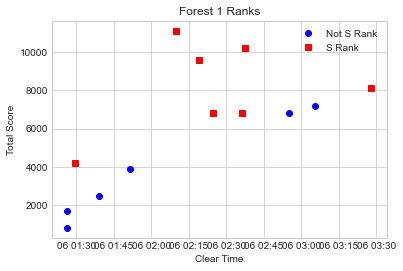

In [12]:
# make plots and adjust x-axis so time ticks are readable
# TODO: make x-axis ticks readable, preferably every 30s labelled
fig, ax = plt.subplots()
#ax.scatter(pd.to_datetime(dataS['Clear Time'].values,), # .to_pytimedelta must change x's size from 7 to 1?
#            dataS['Total Score'].values)

ax.plot(pd.to_datetime(dataNotS['Clear Time'].values),
        dataNotS['Total Score'].values,
        'bo', label='Not S Rank')
ax.plot(pd.to_datetime(dataS['Clear Time'].values),
        dataS['Total Score'].values,
        'rs', label='S Rank')
    
plt.title('Forest 1 Ranks')
plt.xlabel('Clear Time')
plt.ylabel('Total Score')

plt.legend(numpoints = 1);

# don't know how to make x axis readable

#pd.to_datetime(ax.get_xticks()).strftime("%m")
#ax.set_xticklabels([pd.to_datetime(x) for x in ax.get_xticks()])
#plt.xticks(rotation=90);

#ax.xaxis.set_major_locator(plt.MultipleLocator(datetime(year=1970, month=1, day=1, hour=0, minute=0, second=30)))


In [13]:
# must be in 0:mm:ss.xx to have pd.to_timedelta() work
#pd.to_timedelta(data['Clear Time'].values).to_pytimedelta
pd.to_datetime(dataS['Clear Time'].values).to_pydatetime

<bound method inherit_from_data.<locals>.method of DatetimeIndex(['2021-12-06 01:29:21', '2021-12-06 02:10:07',
               '2021-12-06 02:19:14', '2021-12-06 02:24:55',
               '2021-12-06 02:36:16', '2021-12-06 02:37:31',
               '2021-12-06 03:28:04'],
              dtype='datetime64[ns]', freq=None)>

In [14]:
type(pd.to_datetime(dataS['Clear Time'].values))

pandas.core.indexes.datetimes.DatetimeIndex

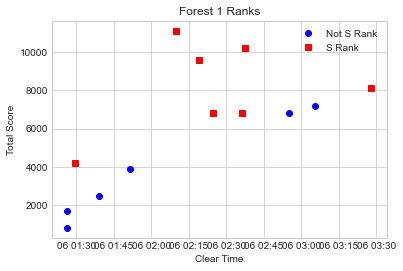

In [15]:
# imports
"""%matplotlib inline
import matplotlib.pyplot as plt
#plt.style.use('seaborn-whitegrid')

import numpy as np
import pandas as pd

from datetime import datetime
from datetime import timedelta"""

#import Forest Village scoreboard + rank data
#sometimes getting rid of 'Mission' header above Forest 1, etc works
#else labels are 1 off or putting header back in also is 1 off
"""scoreboards = pd.read_csv('forest.csv')
scoreboards.head()"""

# copy missions column for index of DataFrame
"""missionsIndex = scoreboards['Mission'].values"""

# make a Series out of each column of the CSV
# use the mission names as the Index
"""ranks = pd.Series(scoreboards['Rank'].values, index = missionsIndex)
total_scores = pd.Series(scoreboards['Total Score'].values, index = missionsIndex)
clear_times = pd.Series(scoreboards['Clear Time'].values, index = missionsIndex)"""

# make a DataFrame with relevant data for plot out of a dictionary of the Series
"""df = pd.DataFrame({'Rank':ranks, 'Total Score':total_scores, 'Clear Time':clear_times})"""

# split DataFrame 
# TODO: find the function that clears NaN rows
"""sRanks = df.loc[df['Rank'] == 'S', ['Rank', 'Total Score', 'Clear Time']]
notSRanks = df.loc[(df['Rank'] != 'S') & (df['Rank'] != '?') & (df['Rank'] != 'NaN'), 
                   ['Rank', 'Total Score', 'Clear Time']]"""


# choose data for this plot (all scoreboards for 1 mission)
dataS = sRanks.loc['Forest 1']
dataNotS = notSRanks.loc['Forest 1']

# make plots and adjust x-axis so time ticks are readable
# TODO: make x-axis ticks readable, preferably every 30s labelled
fig, ax = plt.subplots()

# plot non-Sranks as blue circles
# plot Sranks as red squares
ax.plot(pd.to_datetime(dataNotS['Clear Time'].values),
        dataNotS['Total Score'].values,
        'bo', label='Not S Rank')
ax.plot(pd.to_datetime(dataS['Clear Time'].values),
        dataS['Total Score'].values,
        'rs', label='S Rank')
    
plt.title('Forest 1 Ranks')
plt.xlabel('Clear Time')
plt.ylabel('Total Score')

plt.legend(numpoints = 1);

# don't know how to make x axis readable

#pd.to_datetime(ax.get_xticks()).strftime("%m")
#ax.set_xticklabels([pd.to_datetime(x) for x in ax.get_xticks()])
#plt.xticks(rotation=90);

#ax.xaxis.set_major_locator(plt.MultipleLocator(datetime(year=1970, month=1, day=1, hour=0, minute=0, second=30)))


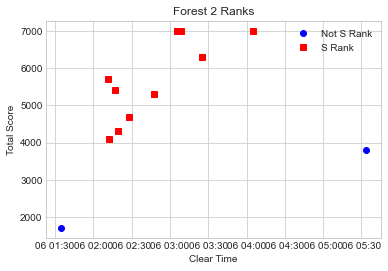

In [16]:
# imports
"""%matplotlib inline
import matplotlib.pyplot as plt
#plt.style.use('seaborn-whitegrid')

import numpy as np
import pandas as pd

from datetime import datetime
from datetime import timedelta"""

#import Forest Village scoreboard + rank data
#sometimes getting rid of 'Mission' header above Forest 1, etc works
#else labels are 1 off or putting header back in also is 1 off
"""scoreboards = pd.read_csv('forest.csv')
scoreboards.head()"""

# copy missions column for index of DataFrame
"""missionsIndex = scoreboards['Mission'].values"""

# make a Series out of each column of the CSV
# use the mission names as the Index
"""ranks = pd.Series(scoreboards['Rank'].values, index = missionsIndex)
total_scores = pd.Series(scoreboards['Total Score'].values, index = missionsIndex)
clear_times = pd.Series(scoreboards['Clear Time'].values, index = missionsIndex)"""

# make a DataFrame with relevant data for plot out of a dictionary of the Series
"""df = pd.DataFrame({'Rank':ranks, 'Total Score':total_scores, 'Clear Time':clear_times})"""

# split DataFrame 
# TODO: find the function that clears NaN rows
"""sRanks = df.loc[df['Rank'] == 'S', ['Rank', 'Total Score', 'Clear Time']]
notSRanks = df.loc[(df['Rank'] != 'S') & (df['Rank'] != '?') & (df['Rank'] != 'NaN'), 
                   ['Rank', 'Total Score', 'Clear Time']]"""


# choose data for this plot (all scoreboards for 1 mission)
dataS = sRanks.loc['Forest 2']
dataNotS = notSRanks.loc['Forest 2']

# make plots and adjust x-axis so time ticks are readable
# TODO: make x-axis ticks readable, preferably every 30s labelled
fig, ax = plt.subplots()

# plot non-Sranks as blue circles
# plot Sranks as red squares
ax.plot(pd.to_datetime(dataNotS['Clear Time'].values),
        dataNotS['Total Score'].values,
        'bo', label='Not S Rank')
ax.plot(pd.to_datetime(dataS['Clear Time'].values),
        dataS['Total Score'].values,
        'rs', label='S Rank')
    
plt.title('Forest 2 Ranks')
plt.xlabel('Clear Time')
plt.ylabel('Total Score')

plt.legend(numpoints = 1);

# don't know how to make x axis readable

#pd.to_datetime(ax.get_xticks()).strftime("%m")
#ax.set_xticklabels([pd.to_datetime(x) for x in ax.get_xticks()])
#plt.xticks(rotation=90);

#ax.xaxis.set_major_locator(plt.MultipleLocator(datetime(year=1970, month=1, day=1, hour=0, minute=0, second=30)))


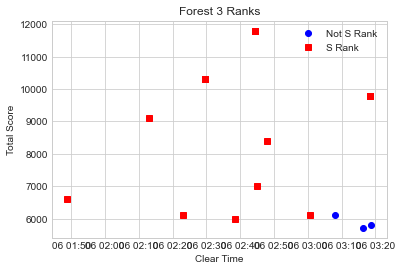

In [17]:
# imports
"""%matplotlib inline
import matplotlib.pyplot as plt
#plt.style.use('seaborn-whitegrid')

import numpy as np
import pandas as pd

from datetime import datetime
from datetime import timedelta"""

#import Forest Village scoreboard + rank data
#sometimes getting rid of 'Mission' header above Forest 1, etc works
#else labels are 1 off or putting header back in also is 1 off
"""scoreboards = pd.read_csv('forest.csv')
scoreboards.head()"""

# copy missions column for index of DataFrame
"""missionsIndex = scoreboards['Mission'].values"""

# make a Series out of each column of the CSV
# use the mission names as the Index
"""ranks = pd.Series(scoreboards['Rank'].values, index = missionsIndex)
total_scores = pd.Series(scoreboards['Total Score'].values, index = missionsIndex)
clear_times = pd.Series(scoreboards['Clear Time'].values, index = missionsIndex)"""

# make a DataFrame with relevant data for plot out of a dictionary of the Series
"""df = pd.DataFrame({'Rank':ranks, 'Total Score':total_scores, 'Clear Time':clear_times})"""

# split DataFrame 
# TODO: find the function that clears NaN rows
"""sRanks = df.loc[df['Rank'] == 'S', ['Rank', 'Total Score', 'Clear Time']]
notSRanks = df.loc[(df['Rank'] != 'S') & (df['Rank'] != '?') & (df['Rank'] != 'NaN'), 
                   ['Rank', 'Total Score', 'Clear Time']]"""


# choose data for this plot (all scoreboards for 1 mission)
dataS = sRanks.loc['Forest 3']
dataNotS = notSRanks.loc['Forest 3']

# make plots and adjust x-axis so time ticks are readable
# TODO: make x-axis ticks readable, preferably every 30s labelled
fig, ax = plt.subplots()

# plot non-Sranks as blue circles
# plot Sranks as red squares
ax.plot(pd.to_datetime(dataNotS['Clear Time'].values),
        dataNotS['Total Score'].values,
        'bo', label='Not S Rank')
ax.plot(pd.to_datetime(dataS['Clear Time'].values),
        dataS['Total Score'].values,
        'rs', label='S Rank')
    
plt.title('Forest 3 Ranks')
plt.xlabel('Clear Time')
plt.ylabel('Total Score')

plt.legend(numpoints = 1);

# don't know how to make x axis readable

#pd.to_datetime(ax.get_xticks()).strftime("%m")
#ax.set_xticklabels([pd.to_datetime(x) for x in ax.get_xticks()])
#plt.xticks(rotation=90);

#ax.xaxis.set_major_locator(plt.MultipleLocator(datetime(year=1970, month=1, day=1, hour=0, minute=0, second=30)))


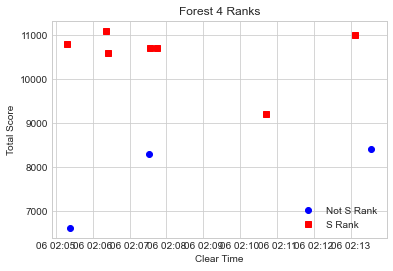

In [18]:
# imports
"""%matplotlib inline
import matplotlib.pyplot as plt
#plt.style.use('seaborn-whitegrid')

import numpy as np
import pandas as pd

from datetime import datetime
from datetime import timedelta"""

#import Forest Village scoreboard + rank data
#sometimes getting rid of 'Mission' header above Forest 1, etc works
#else labels are 1 off or putting header back in also is 1 off
"""scoreboards = pd.read_csv('forest.csv')
scoreboards.head()"""

# copy missions column for index of DataFrame
"""missionsIndex = scoreboards['Mission'].values"""

# make a Series out of each column of the CSV
# use the mission names as the Index
"""ranks = pd.Series(scoreboards['Rank'].values, index = missionsIndex)
total_scores = pd.Series(scoreboards['Total Score'].values, index = missionsIndex)
clear_times = pd.Series(scoreboards['Clear Time'].values, index = missionsIndex)"""

# make a DataFrame with relevant data for plot out of a dictionary of the Series
"""df = pd.DataFrame({'Rank':ranks, 'Total Score':total_scores, 'Clear Time':clear_times})"""

# split DataFrame 
# TODO: find the function that clears NaN rows
"""sRanks = df.loc[df['Rank'] == 'S', ['Rank', 'Total Score', 'Clear Time']]
notSRanks = df.loc[(df['Rank'] != 'S') & (df['Rank'] != '?') & (df['Rank'] != 'NaN'), 
                   ['Rank', 'Total Score', 'Clear Time']]"""


# choose data for this plot (all scoreboards for 1 mission)
dataS = sRanks.loc['Forest 4']
dataNotS = notSRanks.loc['Forest 4']

# make plots and adjust x-axis so time ticks are readable
# TODO: make x-axis ticks readable, preferably every 30s labelled
fig, ax = plt.subplots()

# plot non-Sranks as blue circles
# plot Sranks as red squares
ax.plot(pd.to_datetime(dataNotS['Clear Time'].values),
        dataNotS['Total Score'].values,
        'bo', label='Not S Rank')
ax.plot(pd.to_datetime(dataS['Clear Time'].values),
        dataS['Total Score'].values,
        'rs', label='S Rank')
    
plt.title('Forest 4 Ranks')
plt.xlabel('Clear Time')
plt.ylabel('Total Score')

plt.legend(numpoints = 1);

# don't know how to make x axis readable

#pd.to_datetime(ax.get_xticks()).strftime("%m")
#ax.set_xticklabels([pd.to_datetime(x) for x in ax.get_xticks()])
#plt.xticks(rotation=90);

#ax.xaxis.set_major_locator(plt.MultipleLocator(datetime(year=1970, month=1, day=1, hour=0, minute=0, second=30)))


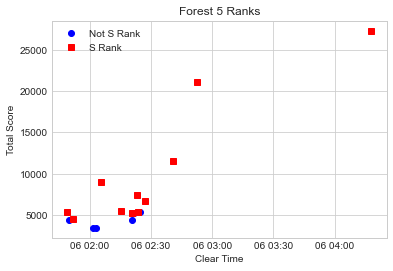

In [19]:
# imports
"""%matplotlib inline
import matplotlib.pyplot as plt
#plt.style.use('seaborn-whitegrid')

import numpy as np
import pandas as pd

from datetime import datetime
from datetime import timedelta"""

#import Forest Village scoreboard + rank data
#sometimes getting rid of 'Mission' header above Forest 1, etc works
#else labels are 1 off or putting header back in also is 1 off
"""scoreboards = pd.read_csv('forest.csv')
scoreboards.head()"""

# copy missions column for index of DataFrame
"""missionsIndex = scoreboards['Mission'].values"""

# make a Series out of each column of the CSV
# use the mission names as the Index
"""ranks = pd.Series(scoreboards['Rank'].values, index = missionsIndex)
total_scores = pd.Series(scoreboards['Total Score'].values, index = missionsIndex)
clear_times = pd.Series(scoreboards['Clear Time'].values, index = missionsIndex)"""

# make a DataFrame with relevant data for plot out of a dictionary of the Series
"""df = pd.DataFrame({'Rank':ranks, 'Total Score':total_scores, 'Clear Time':clear_times})"""

# split DataFrame 
# TODO: find the function that clears NaN rows
"""sRanks = df.loc[df['Rank'] == 'S', ['Rank', 'Total Score', 'Clear Time']]
notSRanks = df.loc[(df['Rank'] != 'S') & (df['Rank'] != '?') & (df['Rank'] != 'NaN'), 
                   ['Rank', 'Total Score', 'Clear Time']]"""


# choose data for this plot (all scoreboards for 1 mission)
dataS = sRanks.loc['Forest 5']
dataNotS = notSRanks.loc['Forest 5']

# make plots and adjust x-axis so time ticks are readable
# TODO: make x-axis ticks readable, preferably every 30s labelled
fig, ax = plt.subplots()

# plot non-Sranks as blue circles
# plot Sranks as red squares
ax.plot(pd.to_datetime(dataNotS['Clear Time'].values),
        dataNotS['Total Score'].values,
        'bo', label='Not S Rank')
ax.plot(pd.to_datetime(dataS['Clear Time'].values),
        dataS['Total Score'].values,
        'rs', label='S Rank')
    
plt.title('Forest 5 Ranks')
plt.xlabel('Clear Time')
plt.ylabel('Total Score')

plt.legend(numpoints = 1);

# don't know how to make x axis readable

#pd.to_datetime(ax.get_xticks()).strftime("%m")
#ax.set_xticklabels([pd.to_datetime(x) for x in ax.get_xticks()])
#plt.xticks(rotation=90);

#ax.xaxis.set_major_locator(plt.MultipleLocator(datetime(year=1970, month=1, day=1, hour=0, minute=0, second=30)))


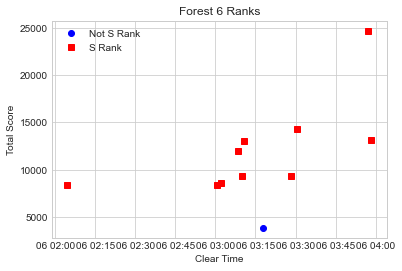

In [20]:
# imports
"""%matplotlib inline
import matplotlib.pyplot as plt
#plt.style.use('seaborn-whitegrid')

import numpy as np
import pandas as pd

from datetime import datetime
from datetime import timedelta"""

#import Forest Village scoreboard + rank data
#sometimes getting rid of 'Mission' header above Forest 1, etc works
#else labels are 1 off or putting header back in also is 1 off
"""scoreboards = pd.read_csv('forest.csv')
scoreboards.head()"""

# copy missions column for index of DataFrame
"""missionsIndex = scoreboards['Mission'].values"""

# make a Series out of each column of the CSV
# use the mission names as the Index
"""ranks = pd.Series(scoreboards['Rank'].values, index = missionsIndex)
total_scores = pd.Series(scoreboards['Total Score'].values, index = missionsIndex)
clear_times = pd.Series(scoreboards['Clear Time'].values, index = missionsIndex)"""

# make a DataFrame with relevant data for plot out of a dictionary of the Series
"""df = pd.DataFrame({'Rank':ranks, 'Total Score':total_scores, 'Clear Time':clear_times})"""

# split DataFrame 
# TODO: find the function that clears NaN rows
sRanks = df.loc[df['Rank'] == 'S', ['Rank', 'Total Score', 'Clear Time']]
notSRanks = df.loc[(df['Rank'] != 'S') & (df['Rank'] != '?') & (df['Rank'] != 'NaN'), 
                   ['Rank', 'Total Score', 'Clear Time']]


# choose data for this plot (all scoreboards for 1 mission)
dataS = sRanks.loc['Forest 6']
dataNotS = notSRanks.loc['Forest 6']

# make plots and adjust x-axis so time ticks are readable
# TODO: make x-axis ticks readable, preferably every 30s labelled
fig, ax = plt.subplots()

# plot non-Sranks as blue circles
# plot Sranks as red squares
# plotting non-Sranks with ".values" breaks if there's 1 or 0 points
ax.plot(pd.to_datetime(dataNotS['Clear Time']),
        dataNotS['Total Score'],
        'bo', label='Not S Rank')
ax.plot(pd.to_datetime(dataS['Clear Time'].values),
        dataS['Total Score'].values,
        'rs', label='S Rank')
    
plt.title('Forest 6 Ranks')
plt.xlabel('Clear Time')
plt.ylabel('Total Score')

plt.legend(numpoints = 1);

# don't know how to make x axis readable

#pd.to_datetime(ax.get_xticks()).strftime("%m")
#ax.set_xticklabels([pd.to_datetime(x) for x in ax.get_xticks()])
#plt.xticks(rotation=90);

#ax.xaxis.set_major_locator(plt.MultipleLocator(datetime(year=1970, month=1, day=1, hour=0, minute=0, second=30)))


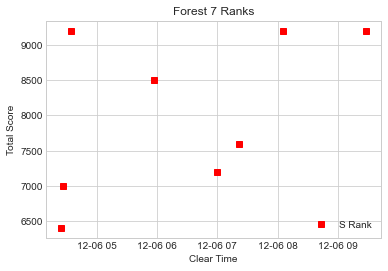

In [21]:
# imports
"""%matplotlib inline
import matplotlib.pyplot as plt
#plt.style.use('seaborn-whitegrid')

import numpy as np
import pandas as pd

from datetime import datetime
from datetime import timedelta"""

#import Forest Village scoreboard + rank data
#sometimes getting rid of 'Mission' header above Forest 1, etc works
#else labels are 1 off or putting header back in also is 1 off
"""scoreboards = pd.read_csv('forest.csv')
scoreboards.head()"""

# copy missions column for index of DataFrame
"""missionsIndex = scoreboards['Mission'].values"""

# make a Series out of each column of the CSV
# use the mission names as the Index
"""ranks = pd.Series(scoreboards['Rank'].values, index = missionsIndex)
total_scores = pd.Series(scoreboards['Total Score'].values, index = missionsIndex)
clear_times = pd.Series(scoreboards['Clear Time'].values, index = missionsIndex)"""

# make a DataFrame with relevant data for plot out of a dictionary of the Series
"""df = pd.DataFrame({'Rank':ranks, 'Total Score':total_scores, 'Clear Time':clear_times})"""

# split DataFrame 
# TODO: find the function that clears NaN rows
sRanks = df.loc[df['Rank'] == 'S', ['Rank', 'Total Score', 'Clear Time']]
notSRanks = df.loc[(df['Rank'] != 'S') & (df['Rank'] != '?') & (df['Rank'] != 'NaN'), 
                   ['Rank', 'Total Score', 'Clear Time']]


# choose data for this plot (all scoreboards for 1 mission)
dataS = sRanks.loc['Forest 7']
"""dataNotS = notSRanks['Forest 7']"""

# make plots and adjust x-axis so time ticks are readable
# TODO: make x-axis ticks readable, preferably every 30s labelled
fig, ax = plt.subplots()

# plot non-Sranks as blue circles
# plot Sranks as red squares
# plotting non-Sranks with ".values" breaks if there's 1 or 0 points
"""ax.plot(pd.to_datetime(dataNotS['Clear Time']),
        dataNotS['Total Score'],
        'bo', label='Not S Rank')"""
ax.plot(pd.to_datetime(dataS['Clear Time'].values),
        dataS['Total Score'].values,
        'rs', label='S Rank')
    
plt.title('Forest 7 Ranks')
plt.xlabel('Clear Time')
plt.ylabel('Total Score')

plt.legend(numpoints = 1);

# don't know how to make x axis readable

#pd.to_datetime(ax.get_xticks()).strftime("%m")
#ax.set_xticklabels([pd.to_datetime(x) for x in ax.get_xticks()])
#plt.xticks(rotation=90);

#ax.xaxis.set_major_locator(plt.MultipleLocator(datetime(year=1970, month=1, day=1, hour=0, minute=0, second=30)))


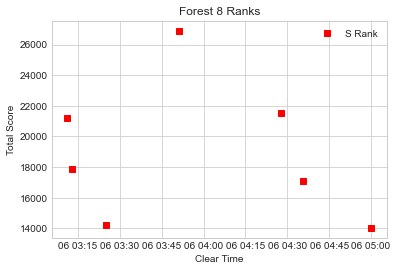

In [22]:
# imports
"""%matplotlib inline
import matplotlib.pyplot as plt
#plt.style.use('seaborn-whitegrid')

import numpy as np
import pandas as pd

from datetime import datetime
from datetime import timedelta"""

#import Forest Village scoreboard + rank data
#sometimes getting rid of 'Mission' header above Forest 1, etc works
#else labels are 1 off or putting header back in also is 1 off
"""scoreboards = pd.read_csv('forest.csv')
scoreboards.head()"""

# copy missions column for index of DataFrame
"""missionsIndex = scoreboards['Mission'].values"""

# make a Series out of each column of the CSV
# use the mission names as the Index
"""ranks = pd.Series(scoreboards['Rank'].values, index = missionsIndex)
total_scores = pd.Series(scoreboards['Total Score'].values, index = missionsIndex)
clear_times = pd.Series(scoreboards['Clear Time'].values, index = missionsIndex)"""

# make a DataFrame with relevant data for plot out of a dictionary of the Series
"""df = pd.DataFrame({'Rank':ranks, 'Total Score':total_scores, 'Clear Time':clear_times})"""

# split DataFrame 
# TODO: find the function that clears NaN rows
sRanks = df.loc[df['Rank'] == 'S', ['Rank', 'Total Score', 'Clear Time']]
notSRanks = df.loc[(df['Rank'] != 'S') & (df['Rank'] != '?') & (df['Rank'] != 'NaN'), 
                   ['Rank', 'Total Score', 'Clear Time']]


# choose data for this plot (all scoreboards for 1 mission)
dataS = sRanks.loc['Forest 8']
"""dataNotS = notSRanks['Forest 8']"""

# make plots and adjust x-axis so time ticks are readable
# TODO: make x-axis ticks readable, preferably every 30s labelled
fig, ax = plt.subplots()

# plot non-Sranks as blue circles
# plot Sranks as red squares
# plotting non-Sranks with ".values" breaks if there's 1 or 0 points
"""ax.plot(pd.to_datetime(dataNotS['Clear Time']),
        dataNotS['Total Score'],
        'bo', label='Not S Rank')"""
ax.plot(pd.to_datetime(dataS['Clear Time'].values),
        dataS['Total Score'].values,
        'rs', label='S Rank')
    
plt.title('Forest 8 Ranks')
plt.xlabel('Clear Time')
plt.ylabel('Total Score')

plt.legend(numpoints = 1);

# don't know how to make x axis readable

#pd.to_datetime(ax.get_xticks()).strftime("%m")
#ax.set_xticklabels([pd.to_datetime(x) for x in ax.get_xticks()])
#plt.xticks(rotation=90);

#ax.xaxis.set_major_locator(plt.MultipleLocator(datetime(year=1970, month=1, day=1, hour=0, minute=0, second=30)))
